In [10]:
## Data Manuplation
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
## For insignificant warnings
warnings.simplefilter(action='ignore', category=Warning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
## Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier

## Feature Engineering and Testing Model
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV,\
    validation_curve, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,\
    plot_roc_curve, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [6]:
data = pd.read_csv('Downloads/heart.csv')

In [7]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
def base_models_classification(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

y = data["output"]
X = data.drop(["output"], axis = 1)

base_models_classification(X,y)

Base Models....
roc_auc: 0.9001 (LR) 
roc_auc: 0.6594 (KNN) 
roc_auc: 0.7054 (SVC) 
roc_auc: 0.7036 (CART) 
roc_auc: 0.904 (RF) 
roc_auc: 0.8418 (Adaboost) 
roc_auc: 0.8926 (GBM) 
roc_auc: 0.8938 (XGBoost) 
roc_auc: 0.8933 (LightGBM) 
roc_auc: 0.9074 (CatBoost) 


We compared different classification models. I will drop some clfs later

Analyzing the Dataset

In [45]:
def data_info(data):
    print("############### OBSERVATIONS-COLUMNS COUNTS ###############")
    print("\n")
    print(data.shape)
    print("############### INDEX ###############")
    print("\n")
    print(data.index)
    print("############### COLUMNS ###############")
    print("\n")
    print(data.columns)
    print("############### DATAFRAME INFORMATIONS ###############")
    print("\n")
    print(data.info())
    print("############### DATAFRAME INFORMATIONS ###############")
    print("\n")
    print(data.describe([0.01, 0.25, 0.50, 0.75, 0.99]).T)

data_info(data)

############### OBSERVATIONS-COLUMNS COUNTS ###############


(303, 16)
############### INDEX ###############


RangeIndex(start=0, stop=303, step=1)
############### COLUMNS ###############


Index(['cp', 'oldpeak', 'caa', 'output', 'scoring', 'age_group_Young', 'sex_1',
       'slp_1', 'slp_2', 'thall_1', 'thall_2', 'thall_3', 'exng_1',
       'restecg_1', 'restecg_2', 'fbs_1'],
      dtype='object')
############### DATAFRAME INFORMATIONS ###############


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cp               303 non-null    int32  
 1   oldpeak          303 non-null    float64
 2   caa              303 non-null    int64  
 3   output           303 non-null    int64  
 4   scoring          303 non-null    float64
 5   age_group_Young  303 non-null    uint8  
 6   sex_1            303 non-null    uint8  
 7   slp_1         

We can say that all variables are normally distributed.

In [14]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Great.There is no missing value in dataset

<AxesSubplot:>

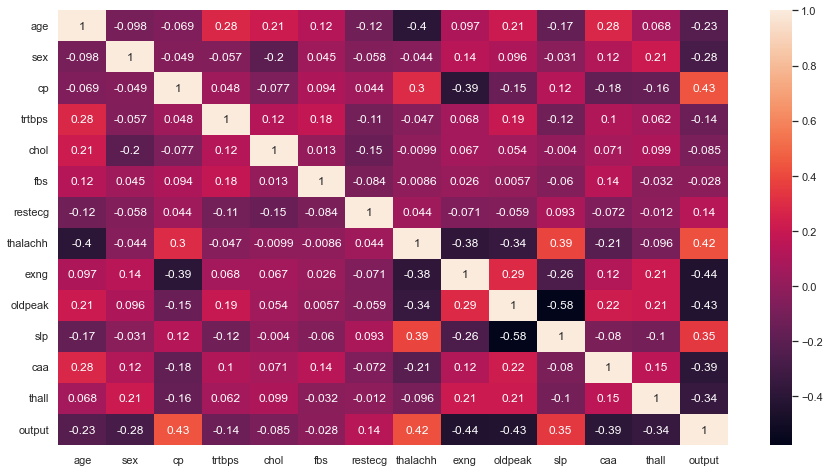

In [17]:
correlation = data.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

We can say that there is no high correlation between variables

In [24]:
def one_hot_encoding(df, cat_cols, drop_first = False, dummy_na = False):
    df = pd.get_dummies(df, columns = cat_cols, dummy_na = dummy_na, drop_first = drop_first)
    return df

In [25]:
def feature_scaling(df, num_col, type = "MinMax", p = 0, q = 1):
    "For inversing the transformation, you can use inverse_transform to the variable you assing for scaling"
    if (type == "MinMax"):
        scaler = MinMaxScaler(feature_range = (p, q))
        df[num_col] = scaler.fit_transform(df[[num_col]])
        return df[num_col]
    elif (type == "Robust"):
        scaler = RobustScaler()
        df[num_col] = scaler.fit_transform(df[[num_col]])
        return df[num_col]
    elif (type == "Standart"):
        scaler = StandardScaler()
        df[num_col] = scaler.fit_transform(df[[num_col]])
        return df[num_col]
    else:
        pass

In [26]:
def preprocessing(df):
    df.loc[df["age"] > 53, "age_group"] = "Young"
    df.loc[df["age"] <= 53, "age_group"] = "Elderly"

    df.loc[df["chol"] < 200, "chol_risk"] = 0#"No Risk"
    df.loc[(df["chol"] >= 200) & (df["chol"] <= 240), "chol_risk"] = 1#"Middle Risk"
    df.loc[df["chol"] > 240, "chol_risk"] = 2#"High Risk"
    df["chol_risk"] = df["chol_risk"].astype(int)

    df.loc[(df["thalachh"] >= 60) & (df["thalachh"] <= 100), "thalachh_situation"] = 0#"Normal"
    df.loc[df["thalachh"] > 100, "thalachh_situation"] = 1#"Risky"
    df["thalachh_situation"] = df["thalachh_situation"].astype(int)

    df.loc[df["trtbps"] < 120, "trtbps_situation"] = 0#"Normal"
    df.loc[(df["trtbps"] >= 120) & (df["trtbps"] <= 139), "trtbps_situation"] = 1#"High"
    df.loc[(df["trtbps"] >= 140) & (df["trtbps"] <= 159), "trtbps_situation"] = 2#"Hypertension-Low"
    df.loc[df["trtbps"] >= 160, "trtbps_situation"] = 3#"Hypertension-High"
    df["trtbps_situation"] = df["trtbps_situation"].astype(int)

    df.loc[df["cp"].isin([1,2,3]),"cp"] = 1
    df.loc[df["cp"] == 0, "cp"] = 0
    df["cp"] = df["cp"].astype(int)

    df["scoring"] = df["chol_risk"] + df["thalachh_situation"] + df["trtbps_situation"]
    df.drop(["chol_risk", "thalachh_situation", "trtbps_situation"], axis = 1, inplace=True)

    for i in ["scoring", "oldpeak"]:
        df[i] = feature_scaling(df,i)

    df = one_hot_encoding(df, ["age_group","sex", "slp", "thall","exng", "restecg", "fbs"], drop_first=True)
    df.drop(["age","chol", "thalachh", "trtbps"] ,axis = 1, inplace=True)

    return df

data = preprocessing(data)

In [37]:
rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}


lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500],
                   "colsample_bytree": [0.7, 1]}


classifiers = [("RF", RandomForestClassifier(), rf_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]

In [38]:
def hyperparameter_optimization_classification(X, y, cv=3, scoring="roc_auc"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

y = data["output"]
X = data.drop("output", axis = 1)

hyperparameter_optimization_classification(X, y, cv=3)

Hyperparameter Optimization....
########## RF ##########
roc_auc (Before): 0.9063
roc_auc (After): 0.9217
RF best params: {'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 15, 'n_estimators': 200}

########## LightGBM ##########
roc_auc (Before): 0.9023
roc_auc (After): 0.9126
LightGBM best params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'n_estimators': 500}



{'RF': RandomForestClassifier(max_depth=8, min_samples_split=15, n_estimators=200),
 'LightGBM': LGBMClassifier(colsample_bytree=0.7, learning_rate=0.01, n_estimators=500)}

Final model

In [39]:
y = data["output"]
X = data.drop("output", axis = 1)

In [40]:
svc_params = {"decision_function_shape": ["ovo", "ovr"],
             "cache_size": [1, 2, 3, 4, 5, 10,40, 50, 100, 200, 500],
             "gamma": ["scale", "auto"],
              "kernel": ["linear", "poly", "rbf", "sigmoid"]}

In [41]:
cv_result = cross_validate(SVC(), X, y, cv=3, scoring="roc_auc")
print(f"ROC-AUC: {round(cv_result['test_score'].mean(), 4)}")

ROC-AUC: 0.9279


In [42]:
svc_best = GridSearchCV(SVC(), svc_params, cv=3, n_jobs=-1, verbose=False).fit(X, y)
final_model = SVC().set_params(**svc_best.best_params_)
cv_result = cross_validate(final_model, X, y, cv=5, scoring="roc_auc")
print(f"ROC-AUC: {round(cv_result['test_score'].mean(), 4)}")

ROC-AUC: 0.9318
